In [ ]:
%pip install  networkx
%pip install pandas
%pip install matplotlib

In [ ]:

import pandas as pd  # Per leggere i file CSV
import networkx as nx  # Per creare e analizzare il grafo
import matplotlib.pyplot as plt  # Per visualizzare il grafo

# import the cvs
node_file = "data/marvel-unimodal-nodes.csv"
edges_file = "data/marvel-unimodal-edges.csv"

# read the csv
nodi = pd.read_csv(node_file)
archi = pd.read_csv(edges_file)

# check if the data are read
print("Esempio di dati dei nodi:")
print(nodi.head())
print("\nEsempio di dati degli archi:")
print(archi.head())

# 2. Creare il grafo
G = nx.Graph()  # can use DiGraph for oriented graph

# add node
for _, row in nodi.iterrows():
    G.add_node(row['Id'], label=row['Label'])

# Add arch
for _, row in archi.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

#number of node and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"\nNumero di nodi: {num_nodes}")
print(f"Numero di archi: {num_edges}")

# degree for each node
degree = dict(G.degree())
print("\nGrado dei nodi:")
print(degree)

# centrality degree
degree_centrality = nx.degree_centrality(G)
print("\nCentralità di grado:")
print({k: round(v, 2) for k, v in degree_centrality.items()})

# centrality: Betweenness
centrality_betweenness = nx.betweenness_centrality(G)
print("\nCentralità di betweenness:")
print({k: round(v, 2) for k, v in centrality_betweenness.items()})

# 4. Visualizzazione del grafo
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G)  # Posizione dei nodi
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=10)
plt.title("Visualizzazione del Grafo")
plt.show()


In [ ]:
nodes_high_degree = [n for n, d in G.degree() if d >= 120]
subnet = G.subgraph(nodes_high_degree)

# plot only the subnet
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(subnet)
nx.draw_networkx_nodes(subnet, pos, node_size=500, node_color="skyblue")
nx.draw_networkx_edges(subnet, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(subnet, pos, labels=nx.get_node_attributes(subnet, 'label'), font_size=10)
plt.title("Sottorete: Nodi con Grado >= 120")
plt.show()

In [ ]:
from pyvis.network import Network

# Create a network interactive
net = Network(notebook=True)
net.from_nx(G)  # add the graph
net.show("grafo_interattivo.html")
# todo: open the file grafo_interattivo.html
# todo: do a better visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx



try:
    G
except NameError:
    raise RuntimeError("Il grafo G non è stato definito. Assicurati di aver eseguito il notebook precedente.")

# 1. calculate the metrics
# grde of each node
degree = dict(G.degree())
df_degree = pd.DataFrame(list(degree.items()), columns=["Nodo", "Grado"])

# Centralty
degree_centrality = nx.degree_centrality(G)
df_degree_centrality = pd.DataFrame(list(degree_centrality.items()), columns=["Nodo", "Centralità di Grado"])

# Betweenness
centrality_betweenness = nx.betweenness_centrality(G)
df_betweenness = pd.DataFrame(list(centrality_betweenness.items()), columns=["Nodo", "Centralità di Betweenness"])

# Merge the dataframes
df_metrics = (
    df_degree
    .merge(df_degree_centrality, on="Nodo")
    .merge(df_betweenness, on="Nodo")
)

# 2. order the nodes by the metrics
print("Top 20 nodi per Grado:")
print(df_metrics.nlargest(20, "Grado"))

print("\nTop 20 nodi per Centralità di Grado:")
print(df_metrics.nlargest(20, "Centralità di Grado"))

print("\nTop 20 nodi per Centralità di Betweenness:")
print(df_metrics.nlargest(20, "Centralità di Betweenness"))

# 3. show the distribution of the metrics
sns.set(style="whitegrid")

# Distribution of the degree
plt.figure(figsize=(10, 6))
sns.histplot(df_metrics["Grado"], bins=20, kde=False, color="blue")
plt.title("Distribuzione del Grado dei Nodi")
plt.xlabel("Grado")
plt.ylabel("Frequenza")
plt.show()

# Distribution of the degree centrality
plt.figure(figsize=(10, 6))
sns.histplot(df_metrics["Centralità di Grado"], bins=20, kde=False, color="green")
plt.title("Distribuzione della Centralità di Grado")
plt.xlabel("Centralità di Grado")
plt.ylabel("Frequenza")
plt.show()

# Distribution of the betweenness centrality
plt.figure(figsize=(10, 6))
sns.histplot(df_metrics["Centralità di Betweenness"], bins=20, kde=False, color="red")
plt.title("Distribuzione della Centralità di Betweenness")
plt.xlabel("Centralità di Betweenness")
plt.ylabel("Frequenza")
plt.show()


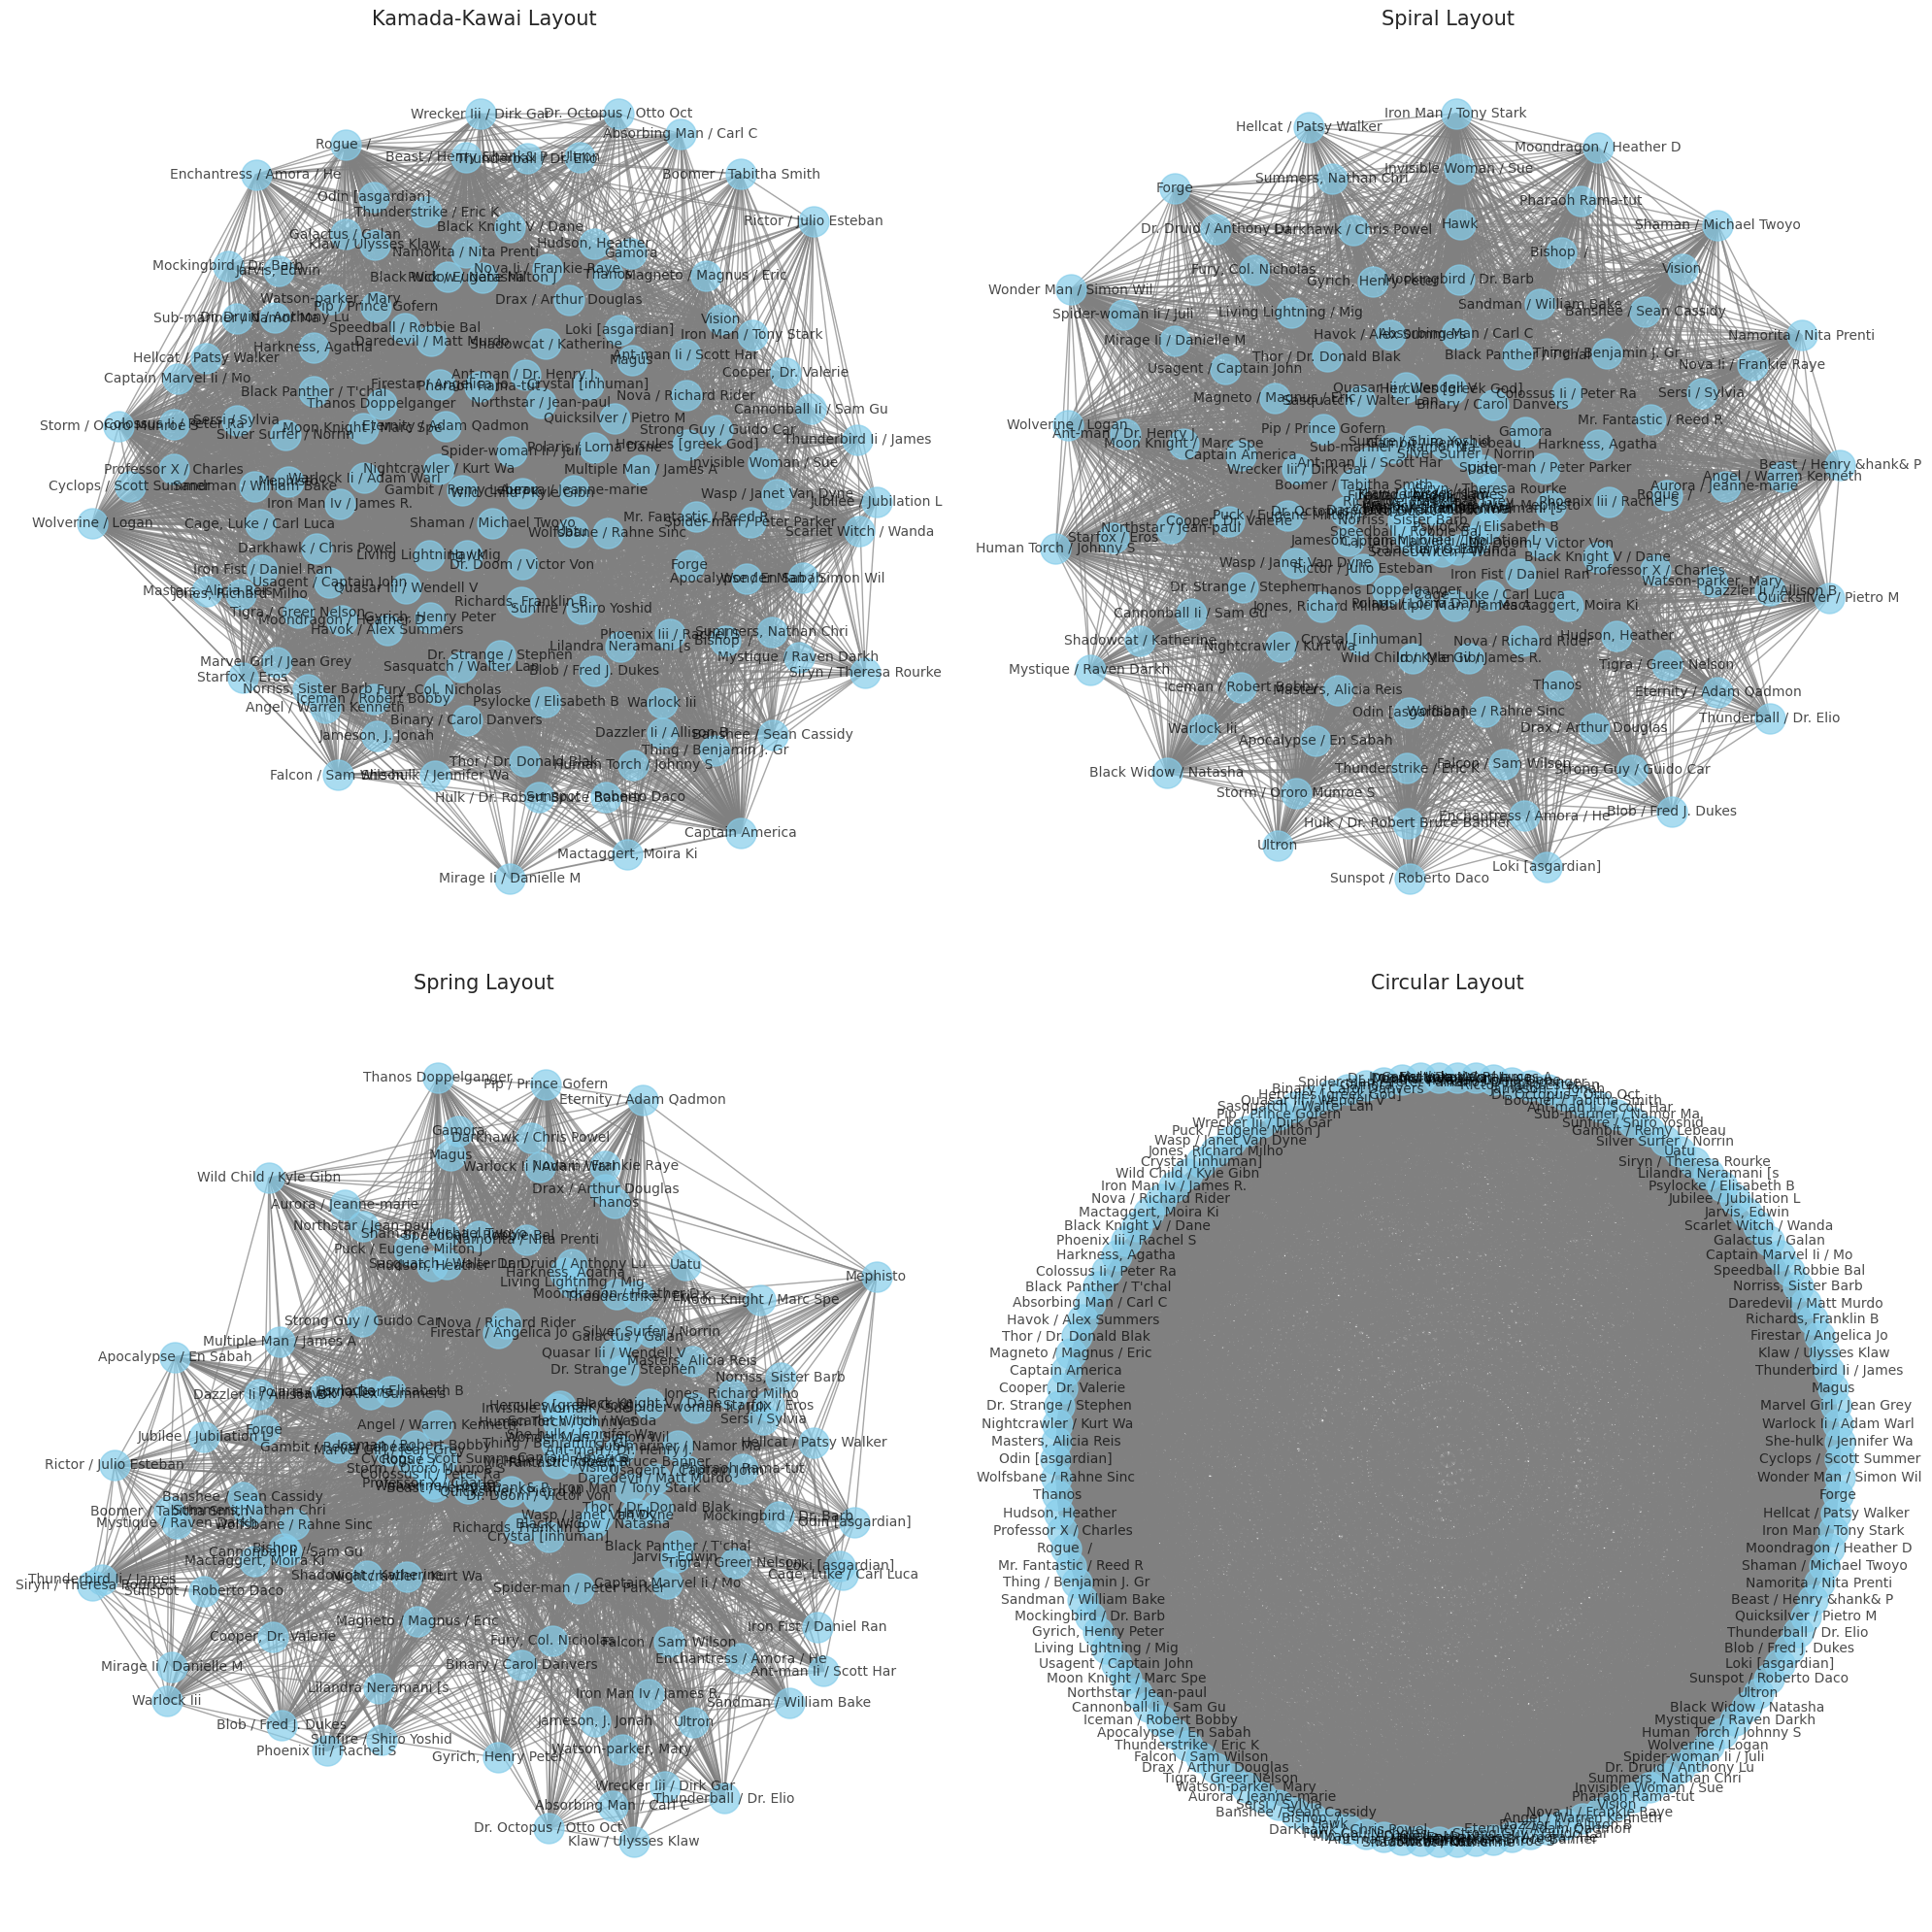

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


node_file = "data/marvel-unimodal-nodes.csv"
edges_file = "data/marvel-unimodal-edges.csv"


nodes = pd.read_csv(node_file)
edges = pd.read_csv(edges_file)

# create the graph
G = nx.Graph()

# filter the nodes with degree > 50
for _, row in nodes.iterrows():
    G.add_node(row['Id'], label=row['Label'])

# add the edges
for _, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# calculate the degree for each node
degree = dict(G.degree())

# filter the nodes with degree > 50
nodes_to_keep = [node for node, deg in degree.items() if deg > 50]

# create the subgraph
G_filtered = G.subgraph(nodes_to_keep)

# create the layouts
layouts = {
    "Kamada-Kawai Layout": nx.kamada_kawai_layout(G_filtered),
    "Spiral Layout": nx.spiral_layout(G_filtered),
    "Spring Layout": nx.spring_layout(G_filtered),
    "Circular Layout": nx.circular_layout(G_filtered)
}

# plot the graph
plt.figure(figsize=(20, 20))  # Dim of the plot
for i, (layout_name, layout_pos) in enumerate(layouts.items(), 1):
    plt.subplot(2, 2, i)  # Grid 2x2
    nx.draw(
        G_filtered,
        pos=layout_pos,  
        with_labels=True,  
        node_size=500,  
        node_color="skyblue",  
        font_size=10,  
        edge_color="gray",  
        alpha=0.7  
    )
    plt.title(layout_name, fontsize=15)  #

plt.tight_layout()
plt.show()
